In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('sonar data.csv', header=None)
sonar_data.head(4)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R


In [3]:
sonar_data.shape

(208, 61)

In [4]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
sum(sonar_data.isnull().sum())

0

In [6]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [7]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [8]:
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [12]:
model = KNeighborsClassifier(n_neighbors=5)

In [13]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

In [15]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8983957219251337


In [16]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [17]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.9047619047619048


In [18]:
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           M       1.00      0.85      0.92        13
           R       0.80      1.00      0.89         8

    accuracy                           0.90        21
   macro avg       0.90      0.92      0.90        21
weighted avg       0.92      0.90      0.91        21



In [19]:
Y_test = Y_test.map({'M':0,'R':1})
X_test_prediction = np.where(X_test_prediction == 'M', 0, 1)

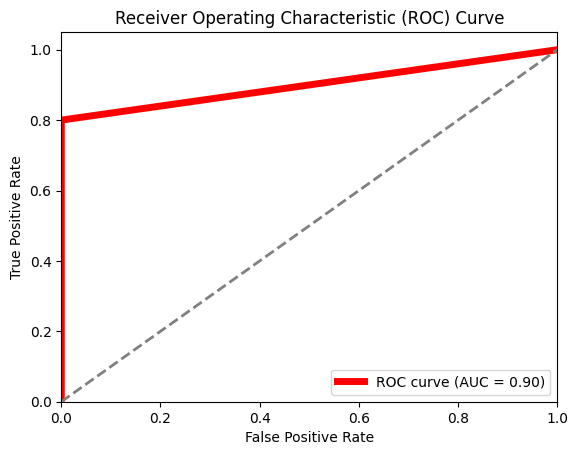

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_true: true binary labels
# y_score: predicted scores (probabilities)
fpr, tpr, thresholds = roc_curve(Y_test, X_test_prediction)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red', lw=5, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


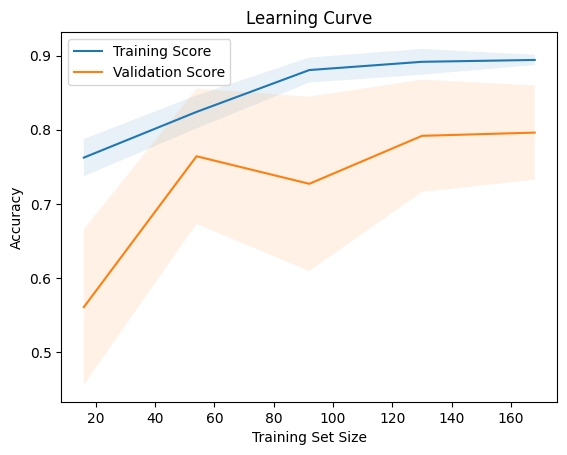

In [21]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=10, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.show()

# MLP

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
Y_train = Y_train.map({'M':0,'R':1})

In [24]:
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(25, activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(12, activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                3050      
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 batch_normalization_1 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 25)                0

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, mode='min')

In [27]:
result = model.fit(X_train, Y_train, 
          epochs=10,
          validation_data=(X_test,Y_test),
          callbacks=[early_stop])

Epoch 1/10
6/6 [==============================] - 1s 45ms/step - loss: 0.8418 - accuracy: 0.5348 - val_loss: 0.7284 - val_accuracy: 0.6190
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.8980 - accuracy: 0.4920 - val_loss: 0.7099 - val_accuracy: 0.6190
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.6857 - accuracy: 0.6471 - val_loss: 0.6945 - val_accuracy: 0.6190
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 0.5944 - accuracy: 0.6738 - val_loss: 0.6775 - val_accuracy: 0.5714
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.5395 - accuracy: 0.6898 - val_loss: 0.6668 - val_accuracy: 0.5714
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.5915 - accuracy: 0.6952 - val_loss: 0.6547 - val_accuracy: 0.6190
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.4949 - accuracy: 0.7754 - val_loss: 0.6361 - val_accuracy: 0.6667
Epoch 8/10
6/6 [=================

In [28]:
loss_df = pd.DataFrame(result.history)
# loss_df.head()

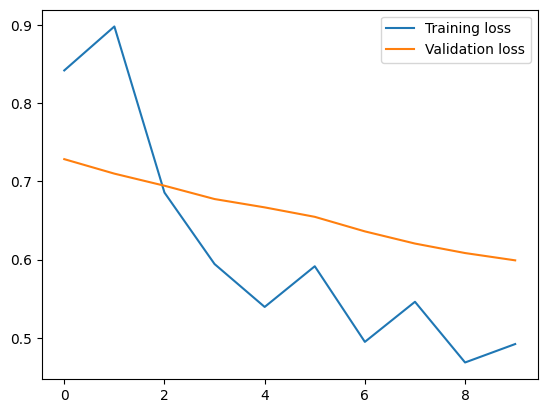

In [29]:
plt.plot(loss_df['loss'], label='Training loss')
plt.plot(loss_df['val_loss'], label='Validation loss')
plt.legend()

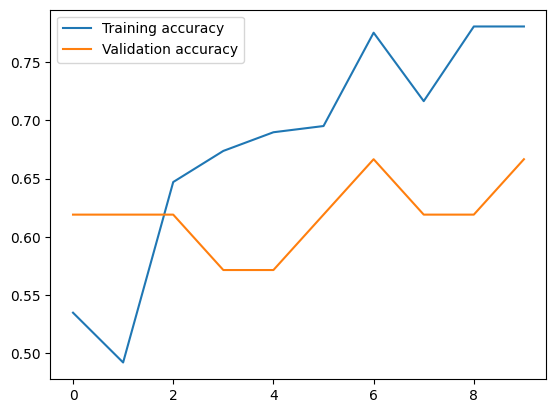

In [30]:
plt.plot(loss_df['accuracy'], label='Training accuracy')
plt.plot(loss_df['val_accuracy'], label='Validation accuracy')
plt.legend()

In [31]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.5991 - accuracy: 0.6667


[0.5990949273109436, 0.6666666865348816]